# EDA and Prediction

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')
import datetime as dt
from scipy import stats as st
import phik
RANDOM_STATE = 12345
import warnings 
warnings.filterwarnings('ignore')
from dateutil import relativedelta as rdelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, f1_score, roc_auc_score
from catboost import CatBoostClassifier
##from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

#### Let us read the data file in the python notebook

In [54]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [55]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

####  Let's explore the data to see if there are any missing values.

In [57]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [59]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


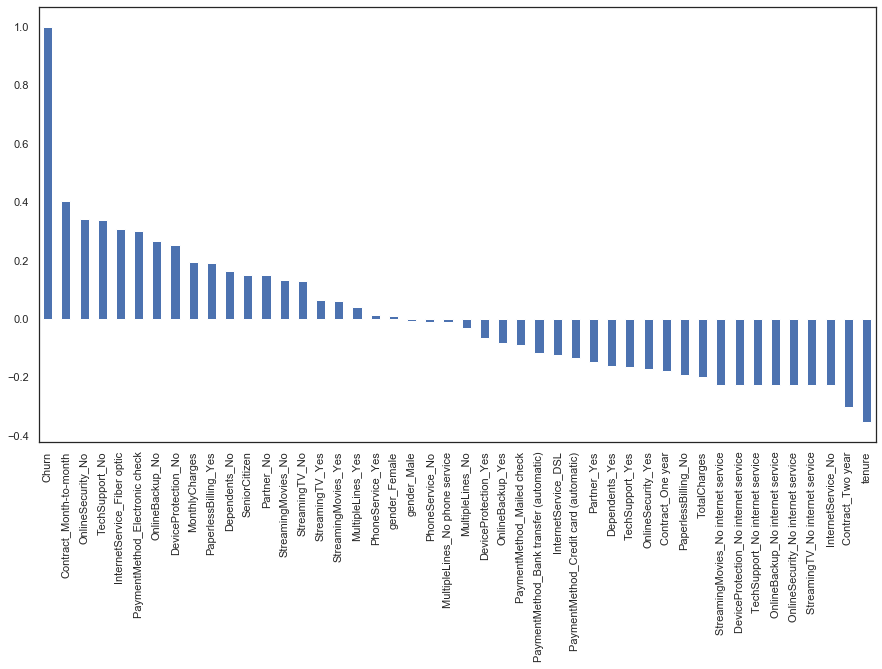

In [60]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

# Data Exploration


Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

A.) Demographics

Let us first understand the gender, age range, patner and dependent status of the customers

1. Gender Distribution - About half of the customers in our data set are male while the other half are female

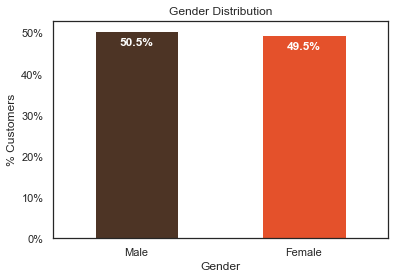

In [61]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

% Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

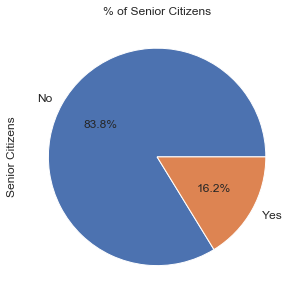

In [62]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

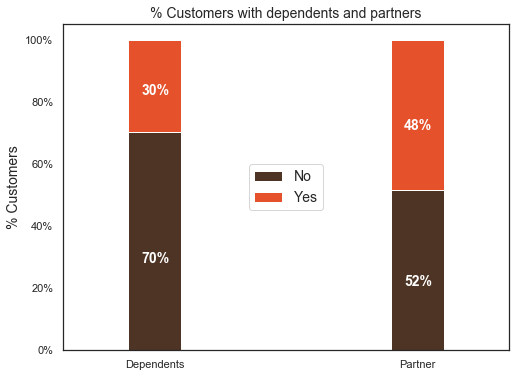

In [63]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

###  What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.



Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

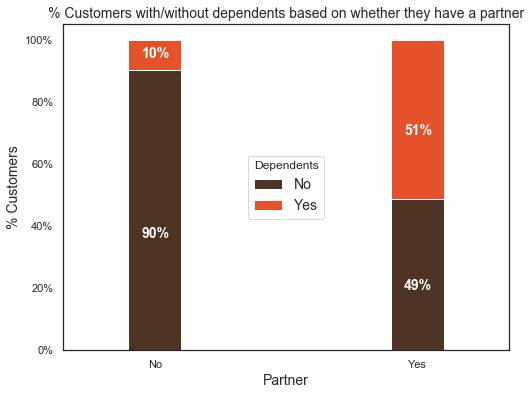

In [64]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

#### B.) Customer Account Information: Let u now look at the tenure, contract

1. Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by their tenure')

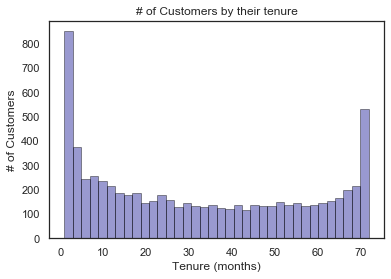

In [65]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

2. Contracts: To understand the above graph, lets first look at the # of customers by different contracts.

Text(0.5, 1.0, '# of Customers by Contract Type')

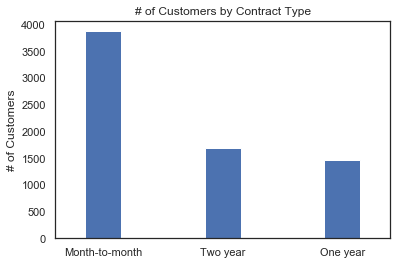

In [66]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

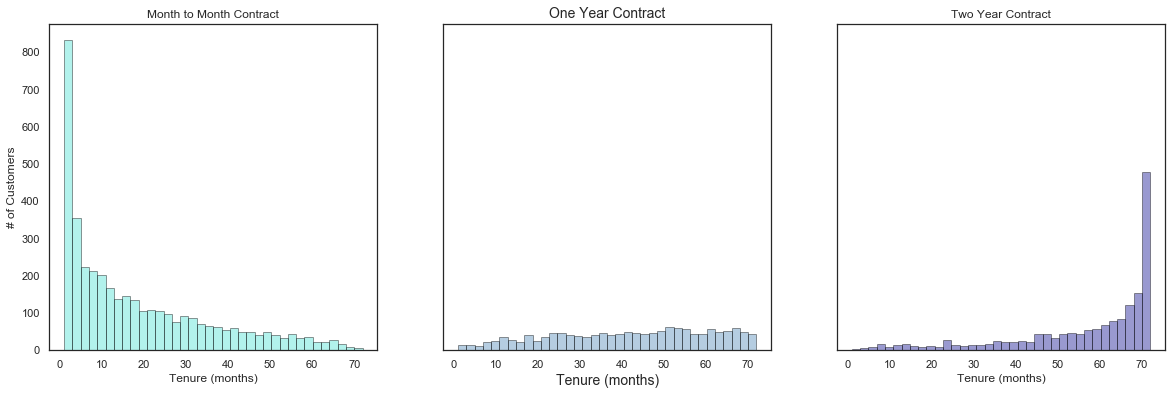

In [67]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

#### C. Let us now look at the distribution of various services used by customers

In [68]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

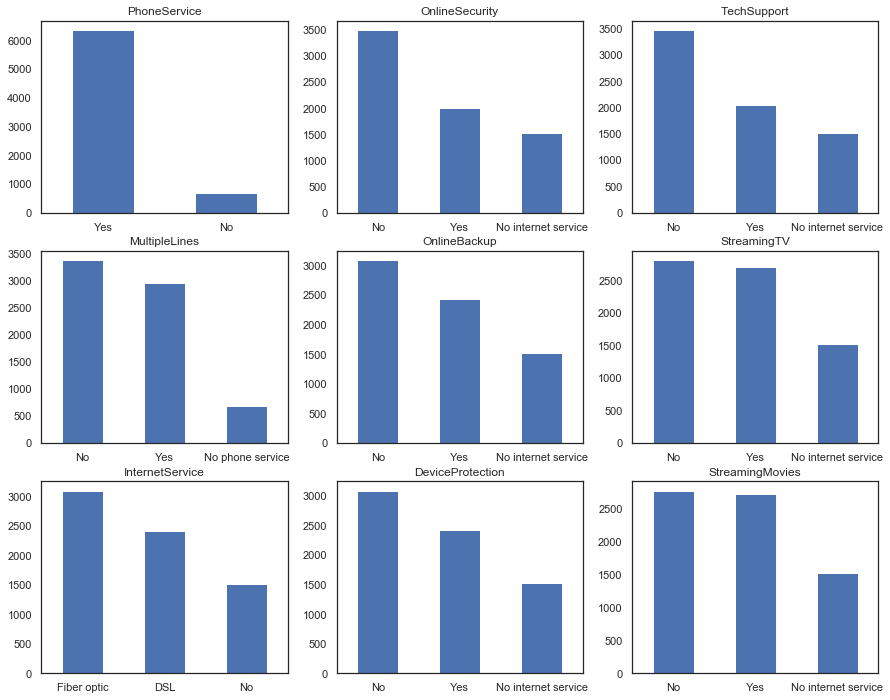

In [69]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#### D.) Now let's take a quick look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


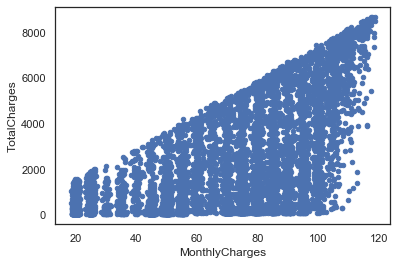

In [70]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

#### E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

Lets first look at the churn rate in our data

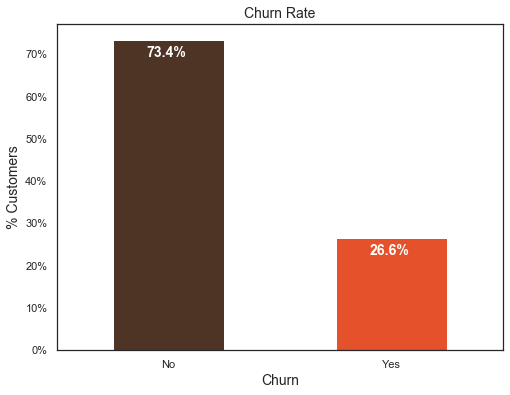

In [71]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

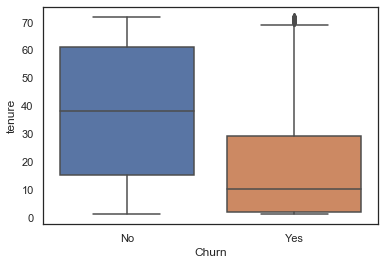

In [72]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

ii.) Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

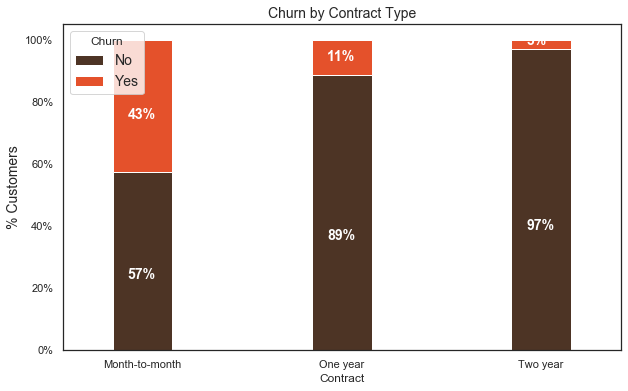

In [73]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

iii.) Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

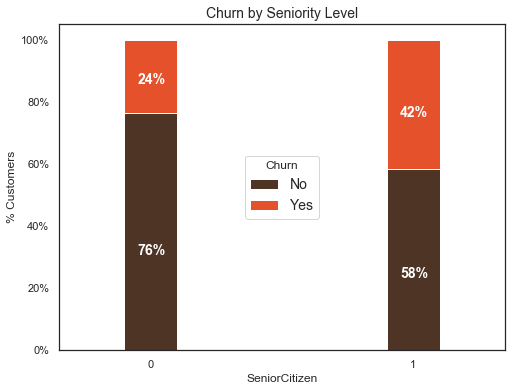

In [74]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

iv.) Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

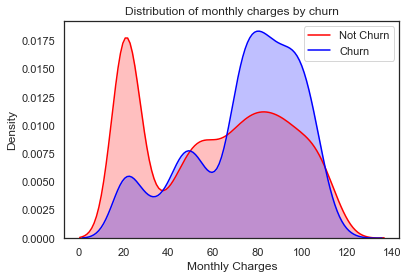

In [75]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

v.) Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

# Model Train and Test

Features prepare

In [146]:

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.head()

data['TotalCharges'] = np.where(data['TotalCharges'] == ' ',0,data['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].astype('float')
print('Successfully changed!')


def change_yes_no(df,column):
    uv = df[column].sort_values().unique()
    if len(uv) == 2 and uv[0] == 'No'and uv[1] == 'Yes':
        df[column] = np.where(df[column] == 'Yes', 1, 0)
        print('Values in '+column+' has changed')
    else:
        df[column] = np.where(df[column] == 'Yes', 1, np.where(df[column] == 'No', 0, -1))
        print('Values in '+column+' has changed')
    return df[column]
columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','TotalCharges']
for column in columns:
    change_yes_no(data,column)
    
    
    
data = data.drop(['PhoneService','TotalCharges'],axis=1)
print('Columns dropped successfully')


quit_users = data.query('Churn == 1')
curr_users = data.query('Churn == 0')
print('Successfully finished')

Successfully changed!
Values in Partner has changed
Values in Dependents has changed
Values in PhoneService has changed
Values in MultipleLines has changed
Values in OnlineSecurity has changed
Values in OnlineBackup has changed
Values in DeviceProtection has changed
Values in TechSupport has changed
Values in StreamingTV has changed
Values in StreamingMovies has changed
Values in PaperlessBilling has changed
Values in Churn has changed
Values in TotalCharges has changed
Columns dropped successfully
Successfully finished


We don't need CustomerID


In [147]:
data = data.drop(['customerID'],axis = 1)
print('Deleted successfully')

Deleted successfully


We saw earlier that there are quite a few indications associated with the use of additional Internet services. The influence of each of them on the target feature is not too great, but I would like to leave the fact of using these features in the model. To do this, we will create one common feature - the number of additional services, correlation between them is too strong. And we will remove these signs themselves.

In [148]:
data['AddServices'] = data['OnlineSecurity']+data['OnlineBackup']+data['DeviceProtection']+data['TechSupport']+data['StreamingTV']+data['StreamingMovies']
data = data.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,AddServices
0,Female,0,1,0,1,-1,DSL,Month-to-month,1,Electronic check,29.85,0,1
1,Male,0,0,0,34,0,DSL,One year,0,Mailed check,56.95,0,2
2,Male,0,0,0,2,0,DSL,Month-to-month,1,Mailed check,53.85,1,2
3,Male,0,0,0,45,-1,DSL,One year,0,Bank transfer (automatic),42.30,0,3
4,Female,0,0,0,2,0,Fiber optic,Month-to-month,1,Electronic check,70.70,1,0


In [149]:
data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'AddServices'],
      dtype=object)

# Features encoding

In [150]:
data_cat = data.copy()
cat_features = ['Contract','PaymentMethod','gender','InternetService']
num_features = ['MonthlyCharges','tenure','AddServices','MultipleLines']
all_features = cat_features + num_features
data=pd.get_dummies(data,drop_first = True)
print('Data encoded')
data.head()

Data encoded


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,AddServices,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,-1,1,29.85,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,0,0,56.95,0,2,1,0,0,1,0,0,0,1
2,0,0,0,2,0,1,53.85,1,2,1,0,0,0,0,0,0,1
3,0,0,0,45,-1,0,42.30,0,3,1,0,0,1,0,0,0,0
4,0,0,0,2,0,1,70.70,1,0,0,1,0,0,0,0,1,0


### Let's split data to features and target

In [151]:
data_target = data['Churn']
data_features = data.drop('Churn',axis=1)

data_cat_target = data_cat['Churn']
data_cat_features = data_cat.drop('Churn',axis = 1)
print('Split successfully')

Split successfully


###### Train and test split

In [152]:
def split_features(features,target):
    feat_train,feat_test,targ_train,targ_test = train_test_split(features,target,test_size=0.2,random_state = RANDOM_STATE)
    print('Train size: '+str(feat_train.shape[0])+', train percent: '+str(feat_train.shape[0]/features.shape[0]))
    print('Test size: '+str(feat_test.shape[0])+', test percent: '+str(feat_test.shape[0]/features.shape[0]))
    return feat_train,feat_test,targ_train,targ_test

In [153]:
data_feat_train,data_feat_test,data_targ_train,data_targ_test = split_features(data_features,data_target)

Train size: 5634, train percent: 0.7999432060201619
Test size: 1409, test percent: 0.20005679397983814


In [154]:
data_cat_feat_train,data_cat_feat_test,data_cat_targ_train,data_cat_targ_test = split_features(data_cat_features,data_cat_target)

Train size: 5634, train percent: 0.7999432060201619
Test size: 1409, test percent: 0.20005679397983814


In [172]:
data_targ_train

1580    0
2902    0
410     1
6098    0
2930    0
       ..
3497    0
3492    0
2177    0
3557    0
4578    0
Name: Churn, Length: 5634, dtype: int32

In [85]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int32  
 2   Dependents                             7043 non-null   int32  
 3   tenure                                 7043 non-null   int64  
 4   MultipleLines                          7043 non-null   int32  
 5   PaperlessBilling                       7043 non-null   int32  
 6   MonthlyCharges                         7043 non-null   float64
 7   AddServices                            7043 non-null   int32  
 8   gender_Male                            7043 non-null   uint8  
 9   InternetService_Fiber optic            7043 non-null   uint8  
 10  InternetService_No                     7043 non-null   uint8  
 11  Cont

Standartization

In [158]:
Scaler = StandardScaler()
data_cat_feat_train[num_features] = Scaler.fit_transform(data_cat_feat_train[num_features])
data_cat_feat_test[num_features] = Scaler.transform(data_cat_feat_test[num_features])
print('Features of data_cat standartized')

Features of data_cat standartized


In [173]:
Scaler = StandardScaler()
data_feat_train[num_features] = Scaler.fit_transform(data_feat_train[num_features])
data_feat_test[num_features] = Scaler.transform(data_feat_test[num_features])
print('Features of data standartized')

Features of data standartized


##### Train and test models

In [174]:
def print_basic_metrics(target_valid, predicted_valid, model, features_valid,model_name,roc_auc_train, acc_train):
    accuracy = accuracy_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    precision = precision_score(target_valid,predicted_valid)
    f1 = f1_score(target_valid,predicted_valid)
    conf_matrix = confusion_matrix(target_valid,predicted_valid)
    roc_auc = roc_auc_score(target_valid,model.predict_proba(features_valid)[::,1])
    print()
    print('\033[1m'+'Metrics for '+model_name+' (test data)'+'\033[0m')
    print()
   # print(model.feature_importances_)
    print('accuracy = ',accuracy)
    print('recall = ',recall)
    print('precision = ',precision)
    print('f1 = ',f1)
    print('auc roc = ',roc_auc)
    print('confusion matrix: ')
    print(conf_matrix)
    is_fi = True
    try:
        coef = pd.Series(model.feature_importances_, index = features_valid.columns)
        imp_coef = coef.sort_values()
    except:
        try:
            coef = pd.Series(model.coef_[0], index = features_valid.columns)
            imp_coef = coef.sort_values()
        except:
            is_fi = False
    try:
        plt.figure(1)
        #plt.rcParams['figure.figsize'] = (8.0, 10.0)
        ax1 = plt.subplot2grid((1,2), (0,0))
        preds = model.predict_proba(features_valid)[::,1]
        # = probs[:,1]
        fpr, tpr, thresholds = roc_curve(target_valid,preds)
        ax1.plot(fpr, tpr,marker ='.' ,label = 'AUC = %0.2f' % roc_auc)
        #plt.rcParams['figure.figsize'] = (8.0, 10.0)
        ax1.legend(loc = 'lower right')
        ax1.plot([0,1],[0,1],linestyle = "--")
        
        ax1.set_xlabel('FPR')
        ax1.set_ylabel('TPR')
        ax1.set_title('ROC-Curve')
        if is_fi == True:
            ax2 = plt.subplot2grid((1,2), (0,1))
            imp_coef.plot(kind = "bar", ax=ax2)
            ax2.set_title("Feature importance")
            
        plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1.5, hspace=1, wspace=0.4)
        plt.show()
    except:
        print('No prdict_proba')
    if roc_auc >= 0.84:
        add_to_best_models(model, roc_auc_train, roc_auc, acc_train, accuracy, recall, precision, f1, model_name)
    return accuracy, recall, precision, f1, conf_matrix, roc_auc

def find_accuracy_zero_model(target, goal_const):
    target_pred_const = pd.Series([goal_const] * len(target))
    print(' accuracy with 100% prediction ',goal_const,' = ',accuracy_score(target,target_pred_const))

In [175]:
def add_to_model_types_compare(mtc,mod_name,roc_auc_train,roc_auc_test,time, acc_train, acc_test):
    mtc = mtc.append({'model_name':mod_name,'acc_Train':acc_train,'acc_Test':acc_test,'_ROC_AUC_Train_Full ':roc_auc_train,'_ROC_AUC_Test_Data':roc_auc_test,'fit time':time},ignore_index = True)
    display(mtc)
    return mtc
model_types_compare = pd.DataFrame()
print('Compare dataset created')

Compare dataset created


In [162]:
def add_to_best_models(model, roc_auc_train, roc_auc_test, acc_train, acc_test, recall_test, precision_test, f1_test, model_name):
    global best_models
    best_models = best_models.append({'_model_name':model_name, '01_ROC_AUC_TRAIN':roc_auc_train,'02_ROC_AUC_TEST':roc_auc_test,'03_Accuracy_TRAIN':acc_train,'04_Accuracy_TEST':acc_test,'05_Recall_TEST':recall_test,'06_Precision_TEST':precision_test,'07_F1_TEST':f1_test},ignore_index=True)
    return best_models
best_models = pd.DataFrame()
print('best models compare dataset created')

best models compare dataset created


In [163]:
def find_best_model(model,params,features_train,target_train,features_test,target_test,mtc,mod_name,mod_lib,cat_features):
    grd = GridSearchCV(estimator = model, param_grid = params, 
                               cv = 5, n_jobs = -1, scoring = 'roc_auc')
    if mod_lib == 'CB':
        grd.fit(features_train, target_train,cat_features = cat_features)
    elif mod_lib == 'SL':
        grd.fit(features_train, target_train)
    elif mod_lib == 'LGBM':
        grd.fit(features_train, target_train,categorical_feature = 'auto')
    #bs = grd.best_score_
    bp = grd.best_params_
    est = grd.best_estimator_
    
    pred = est.predict(features_test)
    train_pred = est.predict(features_train)
    
    train_score = roc_auc_score(target_train,est.predict_proba(features_train)[::,1])
    test_score = roc_auc_score(target_test,est.predict_proba(features_test)[::,1])
    time = grd.refit_time_
    acc_train = accuracy_score(target_train,train_pred)
    acc_test = accuracy_score(target_test,pred)
    
    mtc = add_to_model_types_compare(mtc,mod_name,train_score,test_score,time,acc_train,acc_test)
    print_basic_metrics(target_test, pred, est, features_test,mod_name,train_score,acc_train)
    print('Best model params')
    print(grd.best_params_)
    return mtc,est,bp

In [164]:
def print_fi_plot(fi,indexes,mod_name):
    coef = pd.Series(fi, index = indexes)
    imp_coef = coef.sort_values()
    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance for "+mod_name)
    plt.show()

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree



Metrics for DecisionTree (test data)

accuracy =  0.7239176721078779
recall =  0.8179419525065963
precision =  0.49206349206349204
f1 =  0.6144697720515362
auc roc =  0.8251146348336194
confusion matrix: 
[[710 320]
 [ 69 310]]


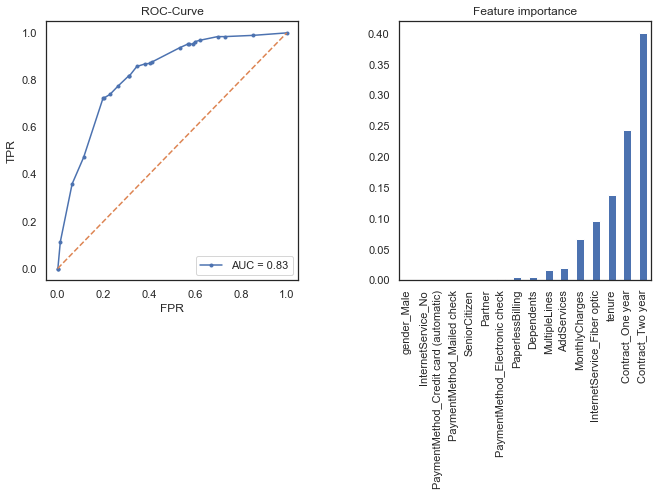

Best model params
{'class_weight': 'balanced', 'max_depth': 5, 'random_state': 12345}


In [165]:
dec_tree = DecisionTreeClassifier()
depth_list = [i for i in range(1,50)]
params = {'max_depth':depth_list,'random_state':[RANDOM_STATE],'class_weight':[None,'balanced']}
model_types_compare ,best_DT,best_DT_BP= find_best_model(dec_tree,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'DecisionTree','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest



Metrics for RandomForest (test data)

accuracy =  0.7955997161107168
recall =  0.45382585751978893
precision =  0.6798418972332015
f1 =  0.5443037974683544
auc roc =  0.842379025027538
confusion matrix: 
[[949  81]
 [207 172]]


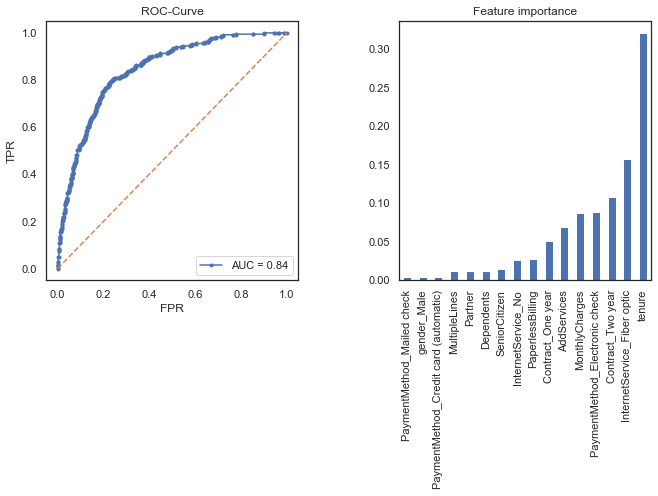

Best model params
{'class_weight': None, 'max_depth': 6, 'n_estimators': 70, 'random_state': 12345}


In [166]:
random_forest = RandomForestClassifier()
depth_list = [i for i in range(2,12)]
estim_list = [i for i in range(45,75,5)]
params = {'max_depth':depth_list,'n_estimators':estim_list,'random_state':[RANDOM_STATE],'class_weight':[None,'balanced']}
model_types_compare ,best_RF,best_RF_BP= find_best_model(random_forest,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'RandomForest','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.231057,AdaBoostClassifier



Metrics for AdaBoostClassifier (test data)

accuracy =  0.7913413768630234
recall =  0.48021108179419525
precision =  0.6523297491039427
f1 =  0.5531914893617021
auc roc =  0.8398275994569255
confusion matrix: 
[[933  97]
 [197 182]]


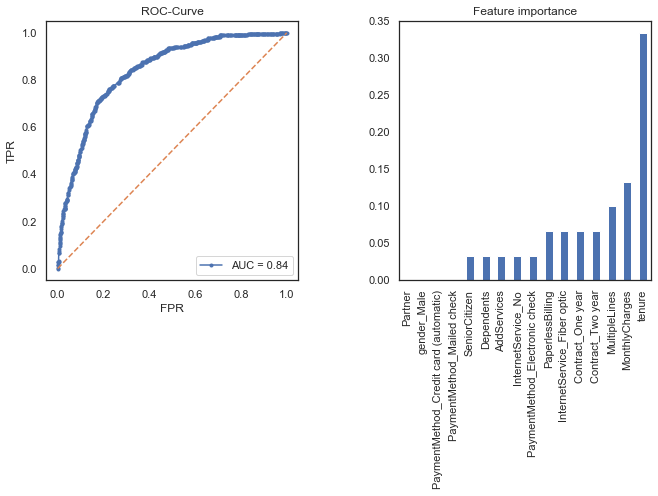

Best model params
{'learning_rate': 0.5, 'n_estimators': 30, 'random_state': 12345}


In [167]:
ada_boost = AdaBoostClassifier()
estim_list = [i for i in range(5,100,5)]
params = {'learning_rate':[0.1,0.5,1,1.5,2],'n_estimators':estim_list,'random_state':[RANDOM_STATE]}
model_types_compare ,best_AB,best_AB_BP= find_best_model(ada_boost,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'AdaBoostClassifier','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.231057,AdaBoostClassifier
3,0.839062,0.863244,0.797729,0.811502,0.983490,GradientBoostingClassifier



Metrics for GradientBoostingClassifier (test data)

accuracy =  0.7977288857345636
recall =  0.5145118733509235
precision =  0.6587837837837838
f1 =  0.5777777777777778
auc roc =  0.8390616594512897
confusion matrix: 
[[929 101]
 [184 195]]


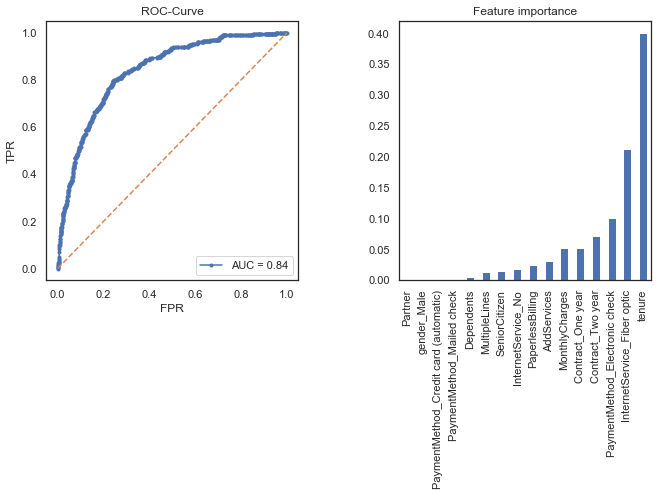

Best model params
{'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 12345}


In [168]:
gb_boost = GradientBoostingClassifier()
estim_list = [i for i in range(50,200,5)]
params = {'learning_rate':[0.001,0.05,0.1,0.5,1],'n_estimators':estim_list,'random_state':[RANDOM_STATE]}
model_types_compare ,best_GB,best_GB_BP= find_best_model(gb_boost,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'GradientBoostingClassifier','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.231057,AdaBoostClassifier
3,0.839062,0.863244,0.797729,0.811502,0.983490,GradientBoostingClassifier
4,0.838241,0.839783,0.797729,0.794995,0.111475,LogisticRegression



Metrics for LogisticRegression (test data)

accuracy =  0.7977288857345636
recall =  0.5197889182058048
precision =  0.6566666666666666
f1 =  0.5802650957290133
auc roc =  0.8382406434920715
confusion matrix: 
[[927 103]
 [182 197]]


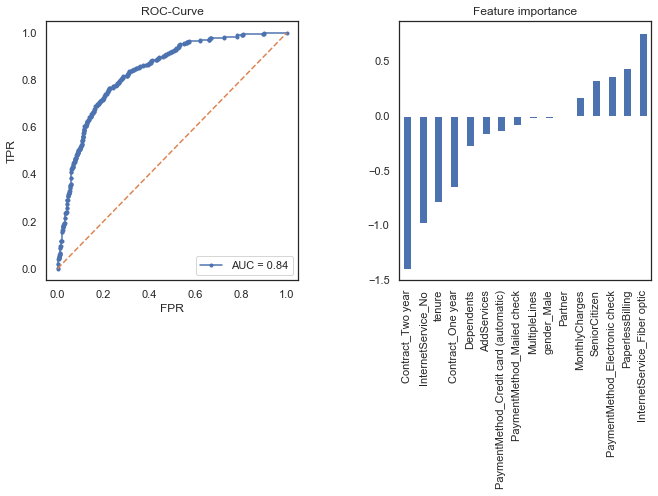

Best model params
{'C': 32, 'class_weight': None, 'penalty': 'l1', 'random_state': 12345, 'solver': 'liblinear'}


In [169]:
LogReg = LogisticRegression()
params = {'penalty':['l1','l2'],'C':[20,25,30,32,35,36,37],'random_state':[RANDOM_STATE],'class_weight':[None,'balanced'],'solver':['liblinear']}
model_types_compare ,best_LR,best_LR_BP= find_best_model(LogReg,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'LogisticRegression','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.231057,AdaBoostClassifier
3,0.839062,0.863244,0.797729,0.811502,0.983490,GradientBoostingClassifier
4,0.838241,0.839783,0.797729,0.794995,0.111475,LogisticRegression
5,0.835256,0.837419,0.764372,0.761271,0.030850,SGDClassifier



Metrics for SGDClassifier (test data)

accuracy =  0.7643718949609652
recall =  0.7651715039577837
precision =  0.5440900562851783
f1 =  0.6359649122807017
auc roc =  0.835256295309578
confusion matrix: 
[[787 243]
 [ 89 290]]


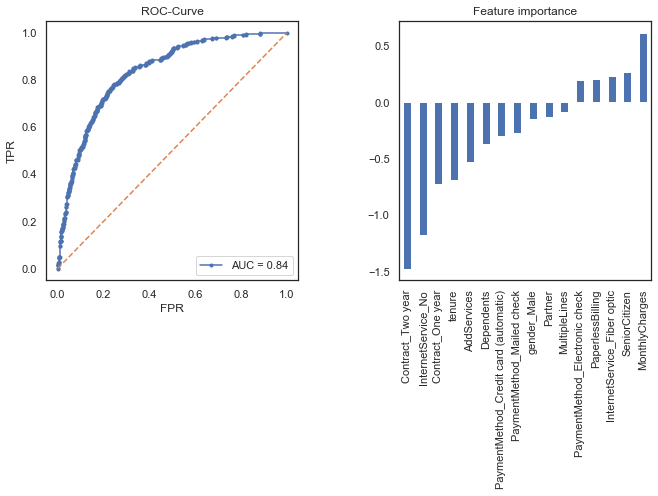

Best model params
{'alpha': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'loss': 'log', 'random_state': 12345}


In [170]:
SGD = SGDClassifier()
params = {'fit_intercept':[True,False],'loss':['log'],'alpha':[0.000001,0.00001,0.00005,0.0001,0.0005,0.001],'random_state':[RANDOM_STATE],'class_weight':[None,'balanced']}
model_types_compare ,best_SGD,best_SGD_BP= find_best_model(SGD,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'SGDClassifier','SL',[])

,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.028411,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.377295,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.231057,AdaBoostClassifier
3,0.839062,0.863244,0.797729,0.811502,0.983490,GradientBoostingClassifier
4,0.838241,0.839783,0.797729,0.794995,0.111475,LogisticRegression
5,0.835256,0.837419,0.764372,0.761271,0.030850,SGDClassifier
6,0.835004,0.844194,0.797019,0.798012,0.050369,KNeighborsClassifier



Metrics for KNeighborsClassifier (test data)

accuracy =  0.7970191625266146
recall =  0.5092348284960422
precision =  0.658703071672355
f1 =  0.574404761904762
auc roc =  0.8350039705920025
confusion matrix: 
[[930 100]
 [186 193]]


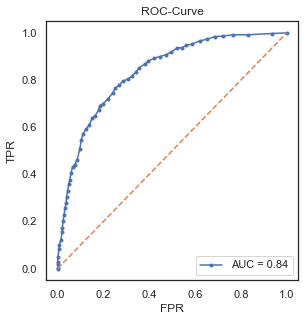

Best model params
{'n_neighbors': 70, 'weights': 'uniform'}


In [171]:
KNCl = KNeighborsClassifier()
params = {'n_neighbors':[60,65,70,75,80,85,90,100],'weights':['uniform', 'distance']}
model_types_compare ,best_KNCl,best_KNCl= find_best_model(KNCl,params,data_feat_train, data_targ_train, data_feat_test, data_targ_test,model_types_compare,'KNeighborsClassifier','SL',[])

0:	learn: 0.6869123	total: 72ms	remaining: 53.9s
749:	learn: 0.3843437	total: 37.1s	remaining: 0us


,_ROC_AUC_Test_Data,_ROC_AUC_Train_Full,acc_Test,acc_Train,fit time,model_name
0,0.825115,0.846121,0.723918,0.740149,0.019309,DecisionTree
1,0.842379,0.867024,0.795600,0.805644,0.355200,RandomForest
2,0.839828,0.852390,0.791341,0.803159,0.136983,AdaBoostClassifier
3,0.839062,0.863244,0.797729,0.811502,0.713292,GradientBoostingClassifier
4,0.838241,0.839783,0.797729,0.794995,0.108266,LogisticRegression
5,0.835256,0.837419,0.764372,0.761271,0.040867,SGDClassifier
6,0.835004,0.844194,0.797019,0.798012,0.057124,KNeighborsClassifier
7,0.844791,0.866044,0.804826,0.814341,37.361954,CatBoostClassifier



Metrics for CatBoostClassifier (test data)

accuracy =  0.8048261178140526
recall =  0.5145118733509235
precision =  0.6818181818181818
f1 =  0.5864661654135337
auc roc =  0.8447908394599996
confusion matrix: 
[[939  91]
 [184 195]]


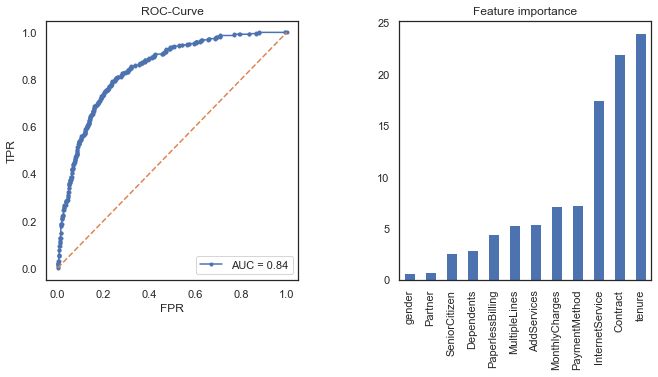

Best model params
{'class_weights': [1, 1], 'learning_rate': 0.01, 'n_estimators': 750, 'random_seed': 12345, 'verbose': 1000}


In [100]:
params = {'learning_rate':[0.01,0.05],'n_estimators':[700,750,800],'random_seed':[RANDOM_STATE],'verbose':[1000],'class_weights':[[1,1],[1,3]]}
cbc = CatBoostClassifier()

model_types_compare, best_CBC,best_CBC_BP = find_best_model(cbc,params,data_cat_feat_train, data_cat_targ_train, data_cat_feat_test, data_cat_targ_test,model_types_compare,'CatBoostClassifier','CB',cat_features)

In [101]:
best_models[['02_ROC_AUC_TEST','04_Accuracy_TEST','05_Recall_TEST','06_Precision_TEST','07_F1_TEST','_model_name']]

,02_ROC_AUC_TEST,04_Accuracy_TEST,05_Recall_TEST,06_Precision_TEST,07_F1_TEST,_model_name
0,0.842379,0.795600,0.453826,0.679842,0.544304,RandomForest
1,0.844791,0.804826,0.514512,0.681818,0.586466,CatBoostClassifier


Best model - CatBoostClassifier

In [211]:
import pickle

model = CatBoostClassifier()

model =  CatBoostClassifier(learning_rate=0.03)
model.fit(data_cat_feat_train,
          data_cat_targ_train,cat_features,
          verbose=False)

# save the model to disk
model.save_model("model")

from_file = CatBoostClassifier()

m = from_file.load_model("model")

NameError: name 'load_model' is not defined

In [196]:
data_cat_feat_test.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,AddServices
1128,Male,0,0,0,-0.223317,-0.508112,No,Month-to-month,1,Electronic check,-1.512322,-1.757234
2875,Male,0,1,0,-0.427837,1.040969,Fiber optic,Month-to-month,1,Electronic check,0.673760,0.065250
1783,Male,0,0,1,-1.286822,-0.508112,Fiber optic,Month-to-month,1,Electronic check,0.226228,-0.195104
3804,Male,0,0,0,-0.918686,1.040969,Fiber optic,Month-to-month,0,Electronic check,0.499073,0.065250
6087,Male,0,0,1,-0.264221,-2.057193,DSL,One year,1,Bank transfer (automatic),-0.828548,0.325605


In [212]:
test = pd.DataFrame({"gender":["Male"],
                     "SeniorCitizen":["0"],
                     "Partner":["0"],
                     "Dependents":["0"],
                     "tenure":["-0.223317"],
                     "MultipleLines":["-0.508112"],
                     "InternetService":["No"],
                     "Contract":["Month-to-month"],
                     "PaperlessBilling":["1"],
                     "PaymentMethod":["Electronic check"],
                     "MonthlyCharges":["-1.512322"],
                     "AddServices":["-1.757234"]
})

print(test)

  gender SeniorCitizen Partner Dependents     tenure MultipleLines  \
0   Male             0       0          0  -0.223317     -0.508112   

  InternetService        Contract PaperlessBilling     PaymentMethod  \
0              No  Month-to-month                1  Electronic check   

  MonthlyCharges AddServices  
0      -1.512322   -1.757234  


In [209]:
CatB = from_file.load_model("model")
y_pred = CatB.predict(test)

y_pred

# show the inputs and predicted outputs
print(y_pred[0])

0


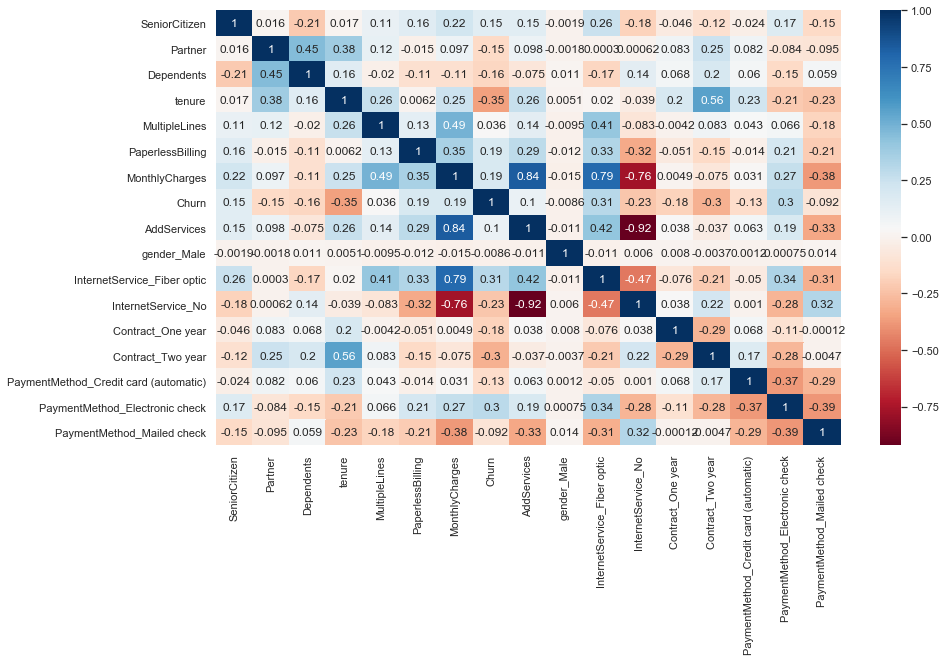

In [203]:
corr = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap='RdBu', annot=True)